In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
df.head(10)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


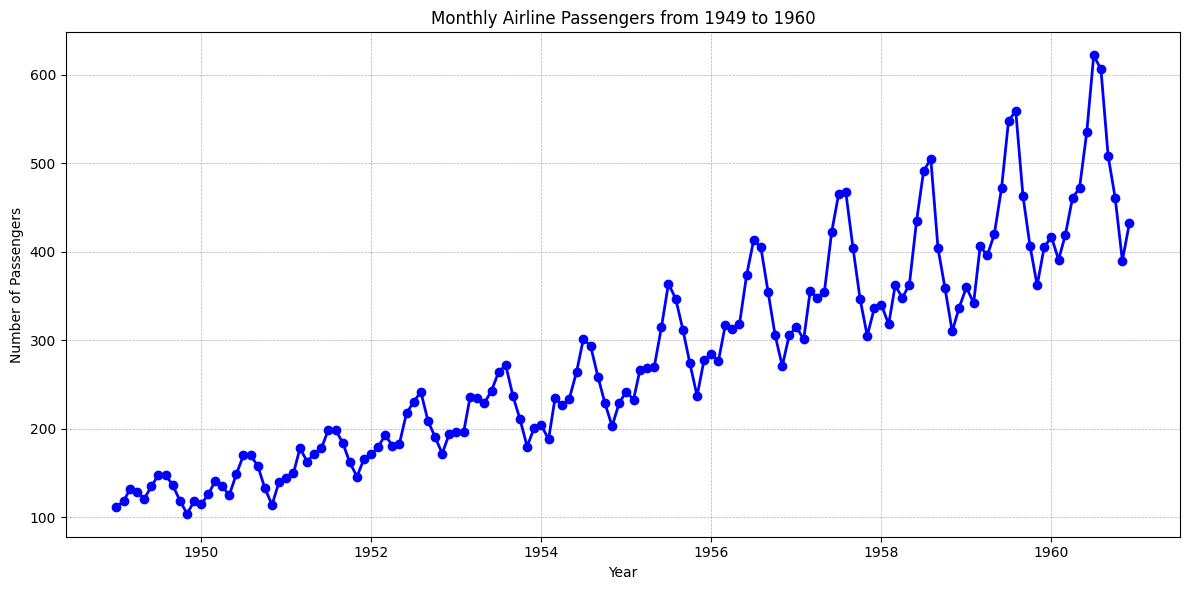

In [3]:
# Creating a line plot
plt.figure(figsize=(12,6))
plt.plot(df, color='blue', marker='o', linestyle='-', linewidth=2, markersize=6)
plt.title('Monthly Airline Passengers from 1949 to 1960')
plt.ylabel('Number of Passengers')
plt.xlabel('Year')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

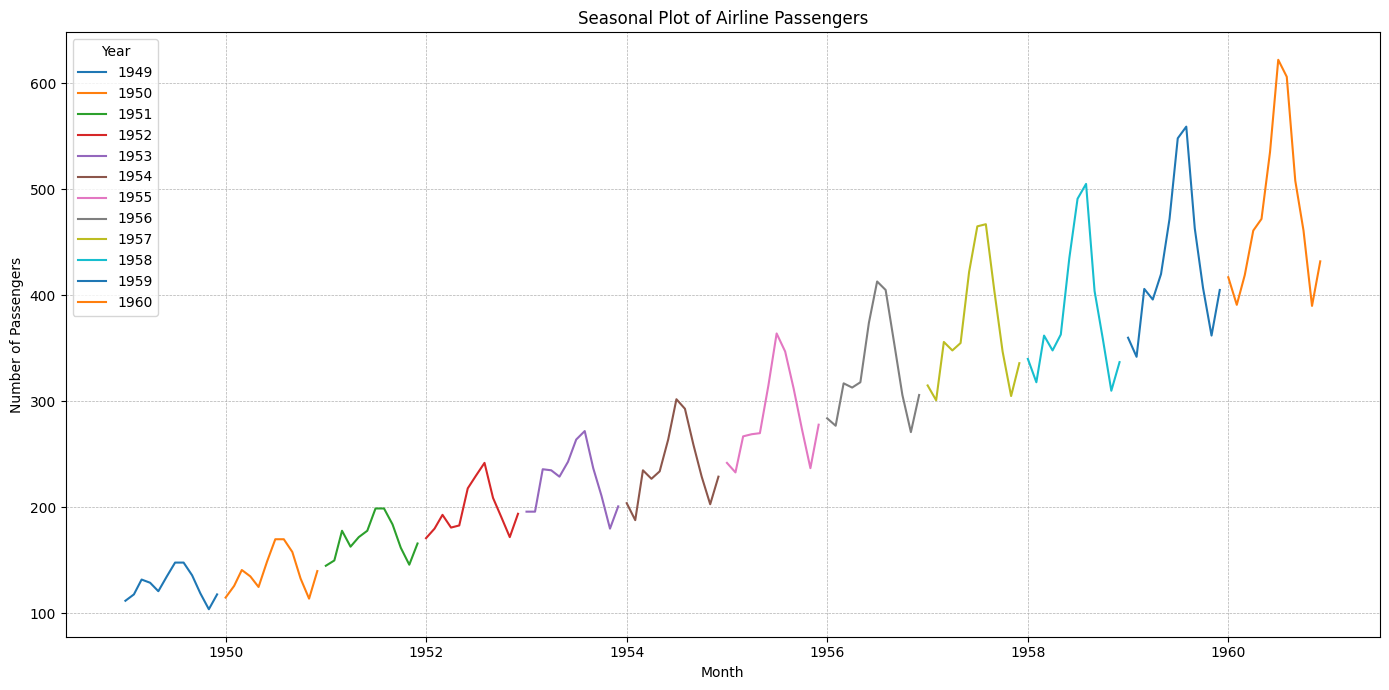

In [4]:
# Extract years from the data
years = df.index.year.unique()

# Plotting each year as its own line
plt.figure(figsize=(14,7))
for year in years:
    subset = df[df.index.year == year]
    plt.plot(subset['Passengers'], label=year)

plt.title('Seasonal Plot of Airline Passengers')
plt.ylabel('Number of Passengers')
plt.xlabel('Month')
plt.legend(title='Year')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

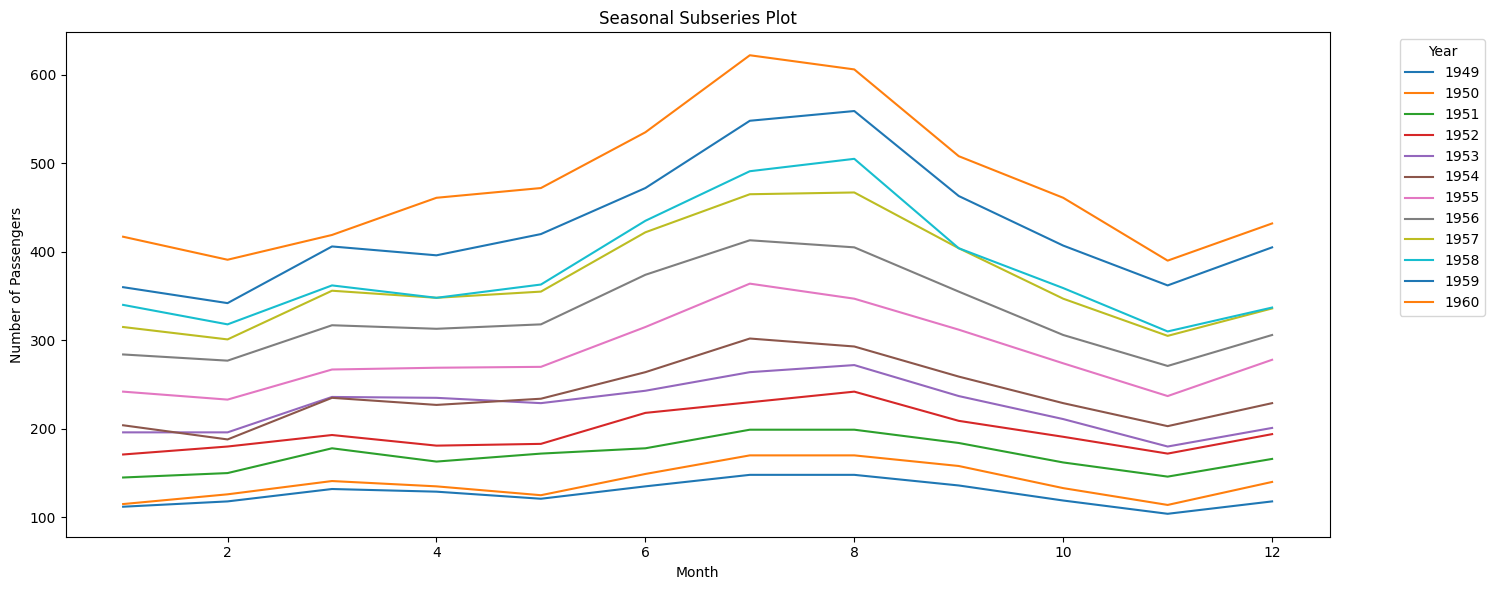

In [5]:
# Extract month and year from the date
df['Year'] = df.index.year
df['month'] = df.index.month

# Pivot table so that we get years on the x-axis and months on the y-axis
table = pd.pivot_table(df, values='Passengers', index=['month'], columns=['Year'], aggfunc='sum')

# Plot the seasonal subseries
fig, ax = plt.subplots(figsize=(15, 6))
table.plot(ax=ax, kind='line', legend=True)
ax.set_xlabel('Month')
ax.set_ylabel('Number of Passengers')
ax.set_title('Seasonal Subseries Plot')
ax.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

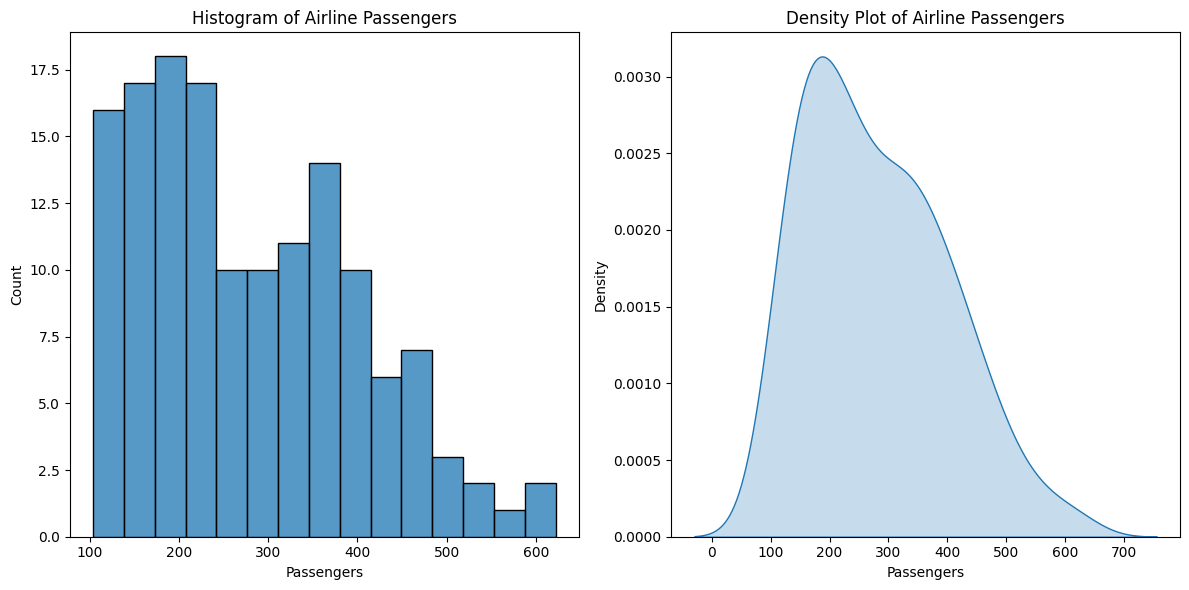

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

# Histogram
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(df['Passengers'], bins=15, kde=False)
plt.title('Histogram of Airline Passengers')

# Density plot (KDE)
plt.subplot(1,2,2)
sns.kdeplot(df['Passengers'], fill=True)
plt.title('Density Plot of Airline Passengers')

plt.tight_layout()
plt.show()


## Excercise 1

### Use the Sunspots dataset (https://www.kaggle.com/datasets/robervalt/sunspots) to demonstrate basic concepts of time series.

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle datasets download -d robervalt/sunspots

Dataset URL: https://www.kaggle.com/datasets/robervalt/sunspots
License(s): CC0-1.0
  0% 0.00/22.4k [00:00<?, ?B/s]
100% 22.4k/22.4k [00:00<00:00, 41.7MB/s]


In [10]:
!unzip sunspots.zip

Archive:  sunspots.zip
  inflating: Sunspots.csv            


In [11]:
sunspots = pd.read_csv('/content/Sunspots.csv')
sunspots.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


In [12]:
len(sunspots)

3265

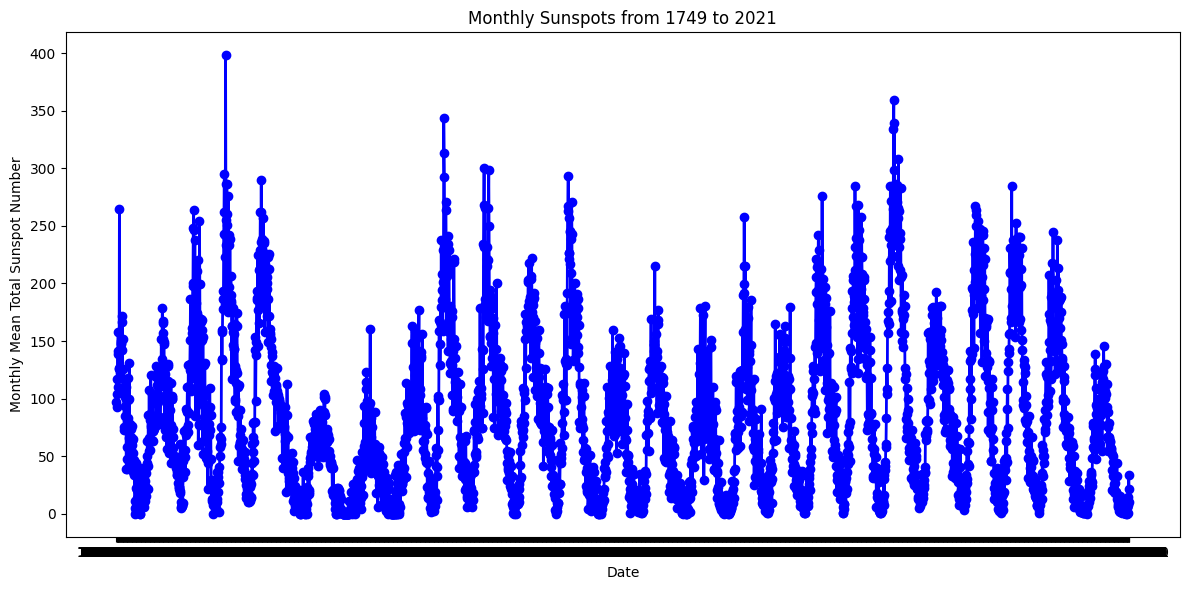

In [13]:
plt.figure(figsize=(12, 6))

# Use the cleaned column name
plt.plot(sunspots['Date'], sunspots['Monthly Mean Total Sunspot Number'], color='blue', marker='o', linestyle='-', linewidth=2, markersize=6)

# Set the title and labels
plt.title('Monthly Sunspots from 1749 to 2021')
plt.ylabel('Monthly Mean Total Sunspot Number')
plt.xlabel('Date')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [14]:
sunspots['Date'] = pd.to_datetime(sunspots['Date'])
sunspots.set_index('Date', inplace=True)

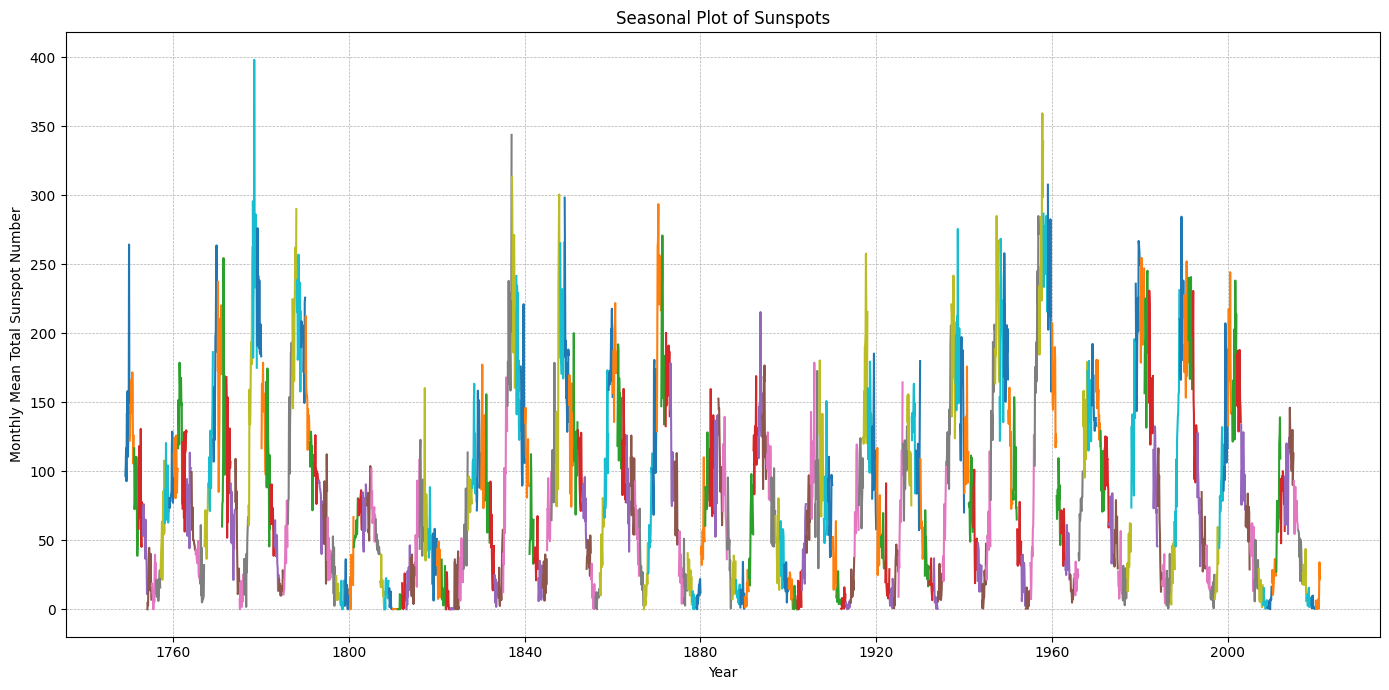

In [15]:
years = sunspots.index.year.unique()
plt.figure(figsize=(14, 7))

for year in years:
  subset = sunspots[sunspots.index.year == year]
  plt.plot(subset.index, subset['Monthly Mean Total Sunspot Number'], label=year)

plt.title('Seasonal Plot of Sunspots')
plt.ylabel('Monthly Mean Total Sunspot Number')
plt.xlabel('Year')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

<ipython-input-16-0957acb097da>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('coolwarm', num_years)


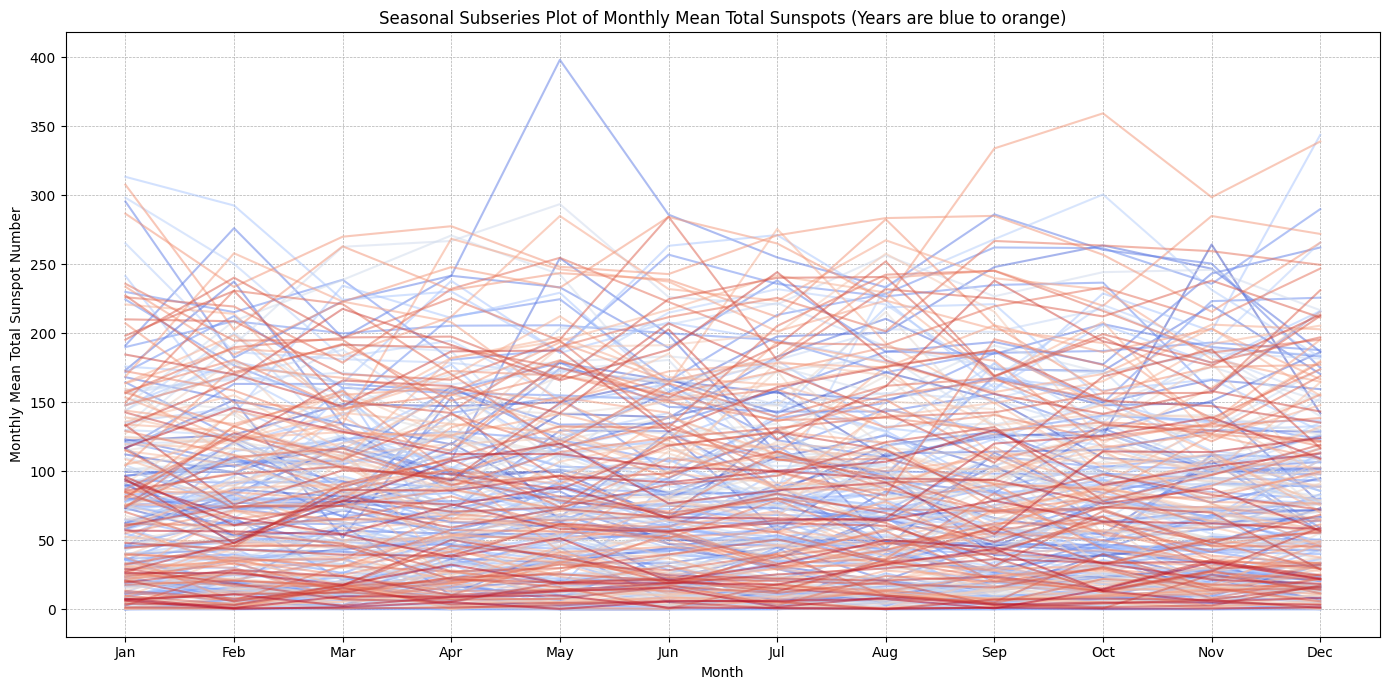

In [16]:
years = sunspots.index.year.unique()

plt.figure(figsize=(14, 7))

# Color map: first years are colored blue and the later years are colored orange
num_years = len(years)
color_map = plt.cm.get_cmap('coolwarm', num_years)

for i, year in enumerate(years):
    subset = sunspots[sunspots.index.year == year]
    color = color_map(i)
    plt.plot(subset.index.month, subset['Monthly Mean Total Sunspot Number'], label=year, color=color, alpha=0.5)

plt.title('Seasonal Subseries Plot of Monthly Mean Total Sunspots (Years are blue to orange)')
plt.ylabel('Monthly Mean Total Sunspot Number')
plt.xlabel('Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


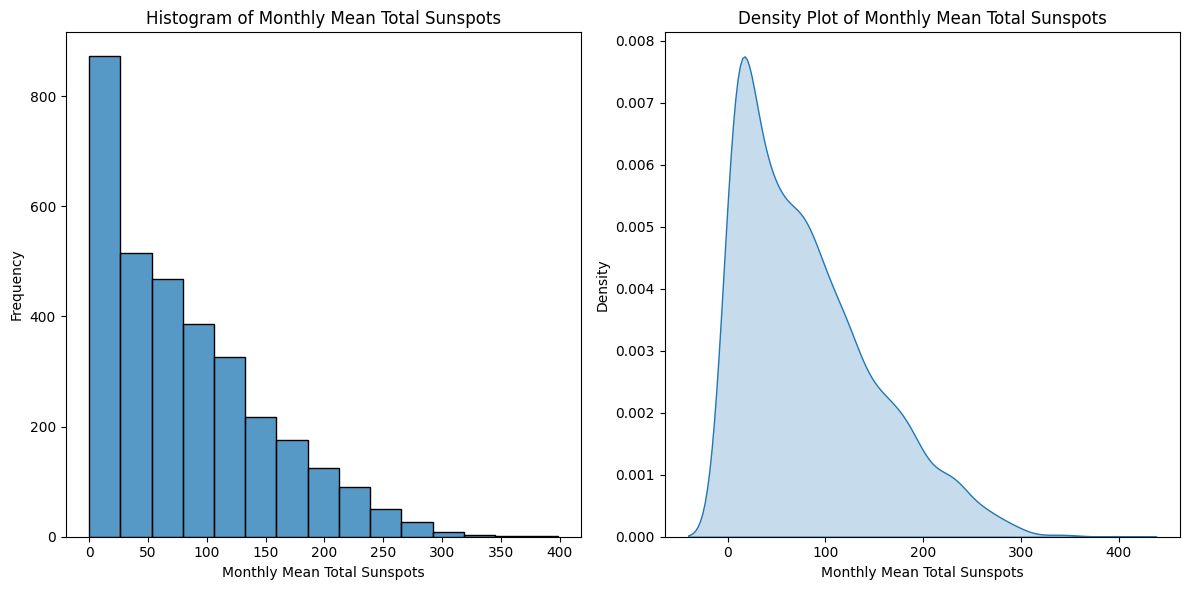

In [17]:
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(sunspots['Monthly Mean Total Sunspot Number'], bins=15, kde=False)
plt.title('Histogram of Monthly Mean Total Sunspots')
plt.xlabel('Monthly Mean Total Sunspots')
plt.ylabel('Frequency')

# Density plot (KDE)
plt.subplot(1, 2, 2)
sns.kdeplot(sunspots['Monthly Mean Total Sunspot Number'], fill=True)
plt.title('Density Plot of Monthly Mean Total Sunspots')
plt.xlabel('Monthly Mean Total Sunspots')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

## Excercise 2

### Use the Unemployment in America dataset (https://www.kaggle.com/datasets/justin2028/unemployment-in-america-per-us-state) to demonstrate basic concepts of time series.

In [18]:
!kaggle datasets download -d justin2028/unemployment-in-america-per-us-state

Dataset URL: https://www.kaggle.com/datasets/justin2028/unemployment-in-america-per-us-state
License(s): CC-BY-NC-SA-4.0
  0% 0.00/826k [00:00<?, ?B/s]
100% 826k/826k [00:00<00:00, 31.6MB/s]


In [19]:
!unzip unemployment-in-america-per-us-state.zip

Archive:  unemployment-in-america-per-us-state.zip
  inflating: Unemployment in America Per US State.csv  


In [20]:
unemployment = pd.read_csv('/content/Unemployment in America Per US State.csv')
unemployment.head()

,FIPS Code,State/Area,Year,Month,Total Civilian Non-Institutional Population in State/Area,Total Civilian Labor Force in State/Area,Percent (%) of State/Area's Population,Total Employment in State/Area,Percent (%) of Labor Force Employed in State/Area,Total Unemployment in State/Area,Percent (%) of Labor Force Unemployed in State/Area
0,1,Alabama,1976,1,"2,605,000","1,484,555",57.0,"1,386,023",53.2,"98,532",6.6
1,2,Alaska,1976,1,"232,000","160,183",69.0,"148,820",64.1,"11,363",7.1
2,4,Arizona,1976,1,"1,621,000","964,120",59.5,"865,871",53.4,"98,249",10.2
3,5,Arkansas,1976,1,"1,536,000","889,044",57.9,"824,395",53.7,"64,649",7.3
4,6,California,1976,1,"15,621,000","9,774,280",62.6,"8,875,685",56.8,"898,595",9.2


In [21]:
len(unemployment)

29892

In [22]:
unemployment.columns

Index(['FIPS Code', 'State/Area', 'Year', 'Month',
       'Total Civilian Non-Institutional Population in State/Area',
       'Total Civilian Labor Force in State/Area',
       'Percent (%) of State/Area's Population',
       'Total Employment in State/Area',
       'Percent (%) of Labor Force Employed in State/Area',
       'Total Unemployment in State/Area',
       'Percent (%) of Labor Force Unemployed in State/Area'],
      dtype='object')

<ipython-input-23-d5e4149e6d45>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemployment_state['Date'] = pd.to_datetime(unemployment_state[['Year', 'Month']].assign(DAY=1))


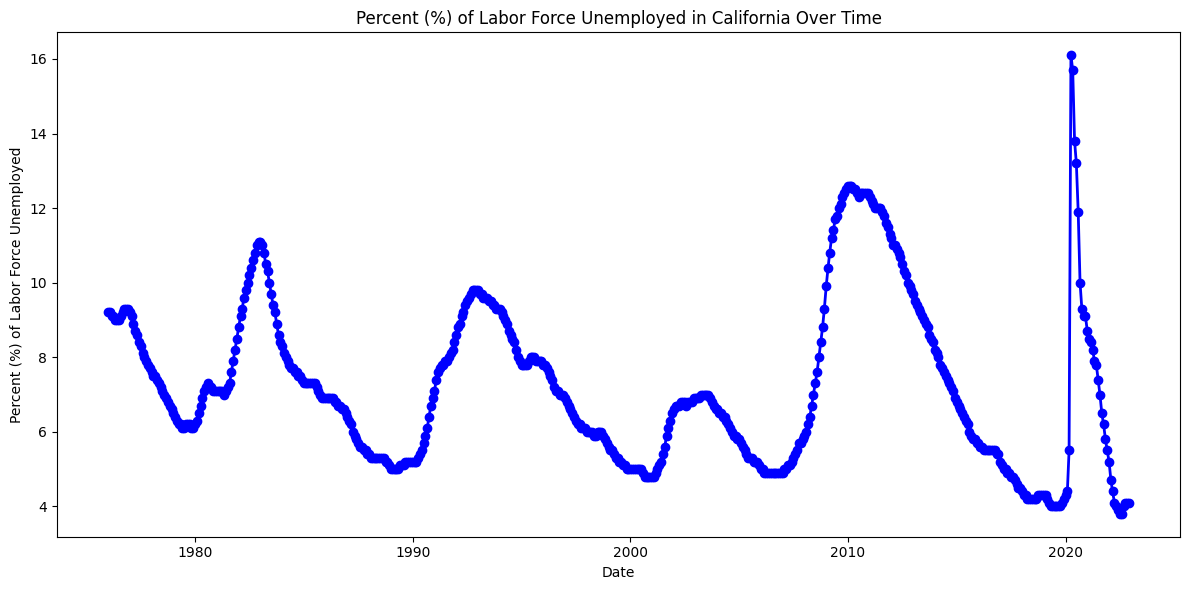

In [23]:
state = 'California'
unemployment_state = unemployment[unemployment['State/Area'] == state]

# Convert 'Year' and 'Month' into a datetime object
unemployment_state['Date'] = pd.to_datetime(unemployment_state[['Year', 'Month']].assign(DAY=1))

plt.figure(figsize=(12, 6))
plt.plot(unemployment_state['Date'], unemployment_state['Percent (%) of Labor Force Unemployed in State/Area'], color='blue', marker='o', linestyle='-', linewidth=2, markersize=6)
plt.title(f'Percent (%) of Labor Force Unemployed in {state} Over Time')
plt.ylabel('Percent (%) of Labor Force Unemployed')
plt.xlabel('Date')

plt.tight_layout()
plt.show()

In [24]:
unemployment_state.set_index('Date', inplace=True)

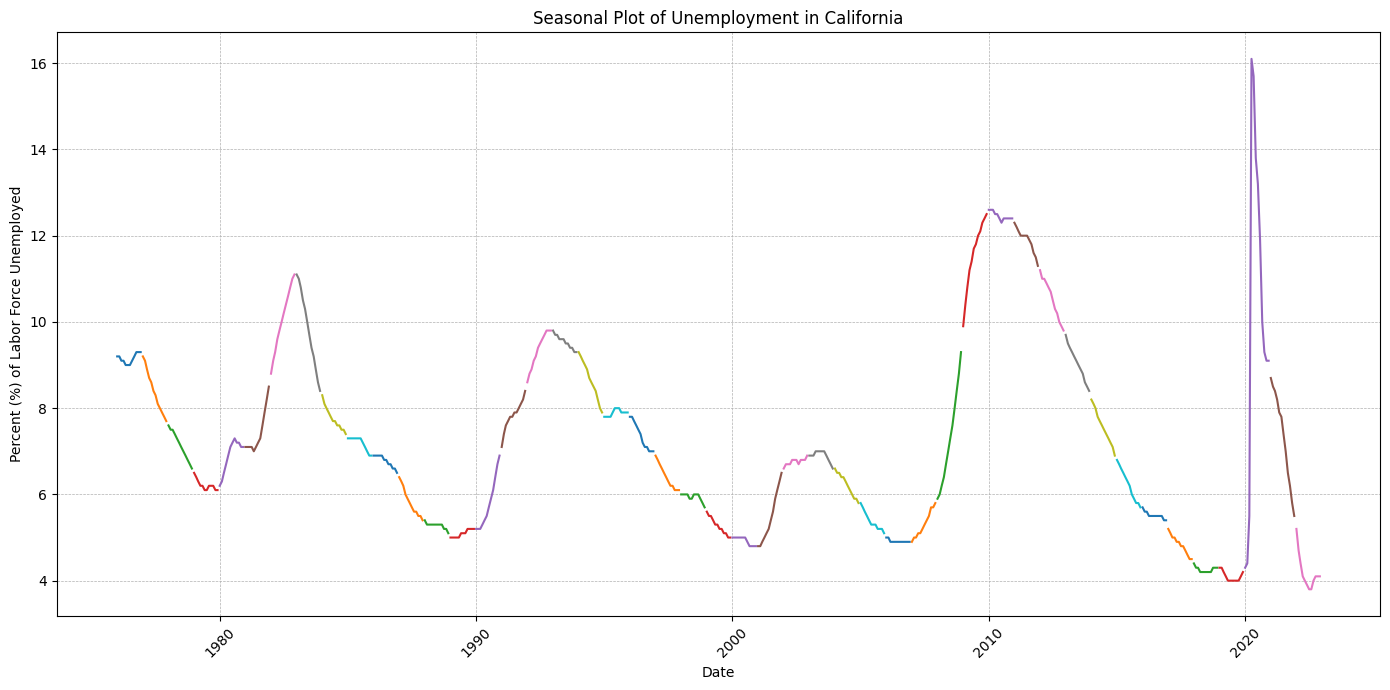

In [25]:
years = unemployment_state.index.year.unique()

plt.figure(figsize=(14, 7))
for year in years:
    subset = unemployment_state[unemployment_state.index.year == year]
    plt.plot(subset.index,
             subset['Percent (%) of Labor Force Unemployed in State/Area'],
             label=year)

plt.title(f'Seasonal Plot of Unemployment in {state}')
plt.ylabel('Percent (%) of Labor Force Unemployed')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

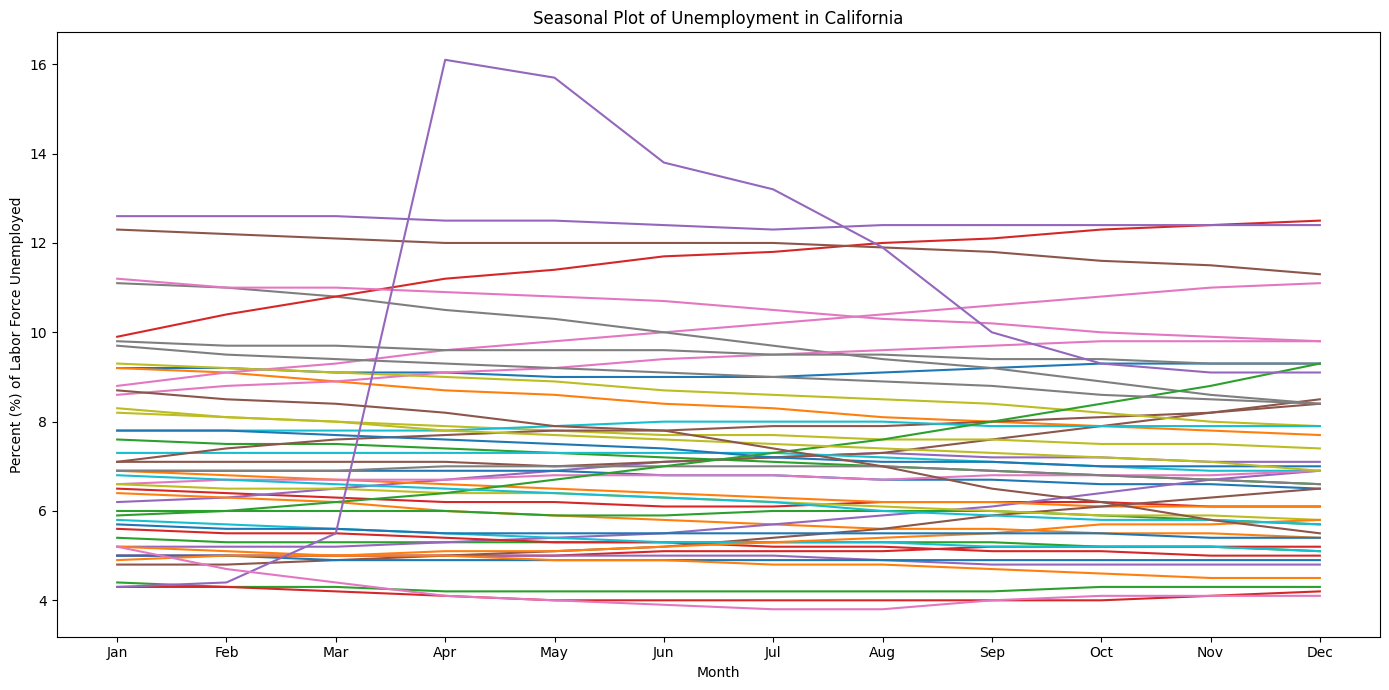

In [26]:
plt.figure(figsize=(14, 7))
for year in years:
    subset = unemployment_state[unemployment_state.index.year == year]
    plt.plot(subset.index.month, subset['Percent (%) of Labor Force Unemployed in State/Area'], label=year)
plt.title(f'Seasonal Plot of Unemployment in {state}')
plt.ylabel('Percent (%) of Labor Force Unemployed')
plt.xlabel('Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.tight_layout()
plt.show()

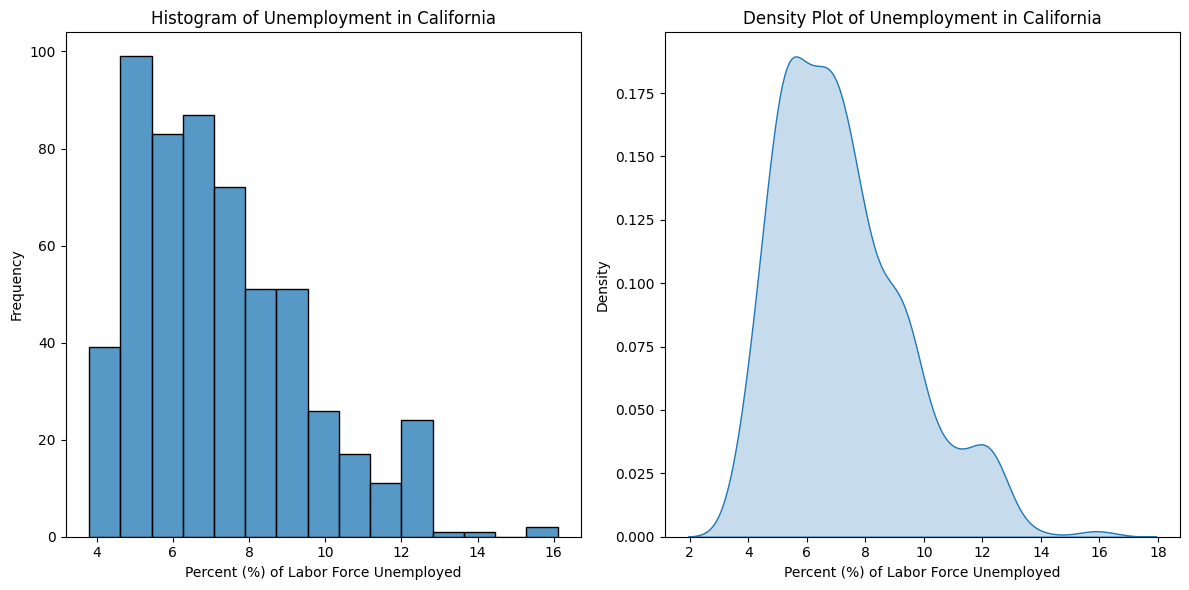

In [27]:
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(unemployment_state['Percent (%) of Labor Force Unemployed in State/Area'], bins=15, kde=False)
plt.title('Histogram of Unemployment in California')
plt.xlabel('Percent (%) of Labor Force Unemployed')
plt.ylabel('Frequency')

# Density plot (KDE)
plt.subplot(1, 2, 2)
sns.kdeplot(unemployment_state['Percent (%) of Labor Force Unemployed in State/Area'], fill=True)
plt.title('Density Plot of Unemployment in California')
plt.xlabel('Percent (%) of Labor Force Unemployed')
plt.ylabel('Density')

plt.tight_layout()
plt.show()